In [2]:
#libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
#libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math


In [3]:
#location of Data
import os
os.getcwd()

'C:\\Users\\Deeho\\OneDrive\\Desktop\\Price OPtimization\\Notebook'

In [8]:
#Data reading
file_path = "/users/Deeho/OneDrive/desktop/Price OPtimization/Data/Jewelry_Dataset.csv"
df = pd.read_csv(file_path,header=None )
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst


In [24]:
# Define meaningful column names
columns =["Order datetime", "Order ID", "Purshased product ID", "quantity of Sku",
          "Category ID", "Catergory alias", "Brand ID", "Price in USD", "User ID",
          "Product gender","Main Color", "Main metal", "Main gem" ]

# Load the CSV without a header row, and apply your own column names         ]
df = pd.read_csv(file_path,header=None ,names= columns )

# Show first few rows
df.head(n=4)




,Order datetime,Order ID,Purshased product ID,quantity of Sku,Category ID,Catergory alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond


In [25]:
#check the colum names
print(df.columns)

Index(['Order datetime', 'Order ID', 'Purshased product ID', 'quantity of Sku',
       'Category ID', 'Catergory alias', 'Brand ID', 'Price in USD', 'User ID',
       'Product gender', 'Main Color', 'Main metal', 'Main gem'],
      dtype='object')


CHECKING FOR MISSING DATA

In [27]:
#check for missing values
df.columns = df.columns.str.strip()
print(df.isnull().sum())


Order datetime              0
Order ID                    0
Purshased product ID        0
quantity of Sku             0
Category ID              5352
Catergory alias          9933
Brand ID                 4785
Price in USD             5352
User ID                  5352
Product gender          48168
Main Color               7660
Main metal               5462
Main gem                34058
dtype: int64


In [26]:
df.shape

(95911, 13)

In [28]:
# Check for unique values-feature cardinalty
df.nunique()

Order datetime          74505
Order ID                74760
Purshased product ID     9613
quantity of Sku             1
Category ID                25
Catergory alias           218
Brand ID                 2537
Price in USD             3166
User ID                 31079
Product gender              2
Main Color                  5
Main metal                  3
Main gem                   30
dtype: int64

In [29]:
# Data description
df.describe()

,Order ID,Purshased product ID,quantity of Sku,Category ID,Brand ID,Price in USD,User ID
count,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,9.112600e+04,90559.000000,9.055900e+04
mean,2.485185e+18,1.815970e+18,1.0,1.805947e+18,8.890938e+16,362.215217,1.512644e+18
std,1.934825e+17,2.136803e+17,0.0,2.083942e+16,3.559633e+17,444.155706,2.374763e+16
min,1.924719e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379723e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524276e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order datetime        95911 non-null  object 
 1   Order ID              95911 non-null  int64  
 2   Purshased product ID  95911 non-null  int64  
 3   quantity of Sku       95911 non-null  int64  
 4   Category ID           90559 non-null  float64
 5   Catergory alias       85978 non-null  object 
 6   Brand ID              91126 non-null  float64
 7   Price in USD          90559 non-null  float64
 8   User ID               90559 non-null  float64
 9   Product gender        47743 non-null  object 
 10  Main Color            88251 non-null  object 
 11  Main metal            90449 non-null  object 
 12  Main gem              61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


FIX DATA TYPES
GOAL:Make sure each column has the right data type. This helps avoid bugs and improves model performance

In [37]:
# Convert order datetime to real datetime format
df['Order datetime'] = pd.to_datetime(df['Order datetime'], errors='coerce')

# Convert numerical fields properly
df['Price in USD'] = pd.to_numeric(df['Price in USD'], errors='coerce')
df['quantity of Sku'] = pd.to_numeric(df['quantity of Sku'], errors='coerce')
df['Brand ID'] = pd.to_numeric(df['Brand ID'], errors='coerce')
df['Category ID'] = pd.to_numeric(df['Category ID'], errors='coerce')
df['User ID'] = pd.to_numeric(df['User ID'], errors='coerce')


HANDLE MISSING VALUES

In [40]:
#categorical colums: fill with"unknown"
cat_cols = ['Catergory alias', 'Main Color', 'Main metal', 'Main gem', 'Product gender']
for col in cat_cols:
    df[col] = df[col].fillna('unknown')

In [53]:
#numerical colums: fill with median
num_cols = ['Price in USD', 'Brand ID']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
df = df.drop_duplicates()
#Drop any remaining columns that are useless (if any):Example if a column is still completely NaN
df = df.dropna(axis=1, how='all')
#Drop unnecessary columns for ML (like IDs)
df = df.drop(columns=[
    "Order ID", "Purshased product ID", "Category ID", "Brand ID", "User ID"
])
#Display the cleaned Dataset
df.head()

,Order datetime,quantity of Sku,Catergory alias,Price in USD,Product gender,Main Color,Main metal,Main gem
0,2018-12-01 11:40:29+00:00,1,jewelry.earring,561.51,unknown,red,gold,diamond
1,2018-12-01 17:38:31+00:00,1,unknown,212.14,unknown,yellow,gold,unknown
2,2018-12-02 13:53:42+00:00,1,jewelry.pendant,54.66,f,white,gold,sapphire
3,2018-12-02 17:44:02+00:00,1,jewelry.pendant,88.90,f,red,gold,diamond
4,2018-12-02 21:30:19+00:00,1,jewelry.necklace,417.67,unknown,red,gold,amethyst


#EXPLORATORY DATA ANALYSIS (EDA)

In [47]:

print(df['quantity of Sku'].value_counts())

quantity of Sku
1    93322
Name: count, dtype: int64


In [48]:
print(df['Catergory alias'].value_counts())

Catergory alias
jewelry.earring     29048
jewelry.ring        26025
jewelry.pendant     13083
unknown              9837
jewelry.bracelet     6129
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 219, dtype: int64


In [49]:
print(df['Price in USD'].describe())

count    93322.000000
mean       357.709642
std        436.259592
min          0.990000
25%        150.550000
50%        258.770000
75%        417.670000
max      34448.600000
Name: Price in USD, dtype: float64


In [54]:
#Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up styling for better plots
sns.set(style="whitegrid")


In [55]:
# Basic structure
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 93322 entries, 0 to 95910
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Order datetime   93322 non-null  datetime64[ns, UTC]
 1   quantity of Sku  93322 non-null  int64              
 2   Catergory alias  93322 non-null  object             
 3   Price in USD     93322 non-null  float64            
 4   Product gender   93322 non-null  object             
 5   Main Color       93322 non-null  object             
 6   Main metal       93322 non-null  object             
 7   Main gem         93322 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 6.4+ MB


,quantity of Sku,Price in USD
count,93322.0,93322.000000
mean,1.0,357.709642
std,0.0,436.259592
min,1.0,0.990000
25%,1.0,150.550000
50%,1.0,258.770000
75%,1.0,417.670000
max,1.0,34448.600000


In [56]:
# Count missing values
df.isnull().sum()

Order datetime     0
quantity of Sku    0
Catergory alias    0
Price in USD       0
Product gender     0
Main Color         0
Main metal         0
Main gem           0
dtype: int64

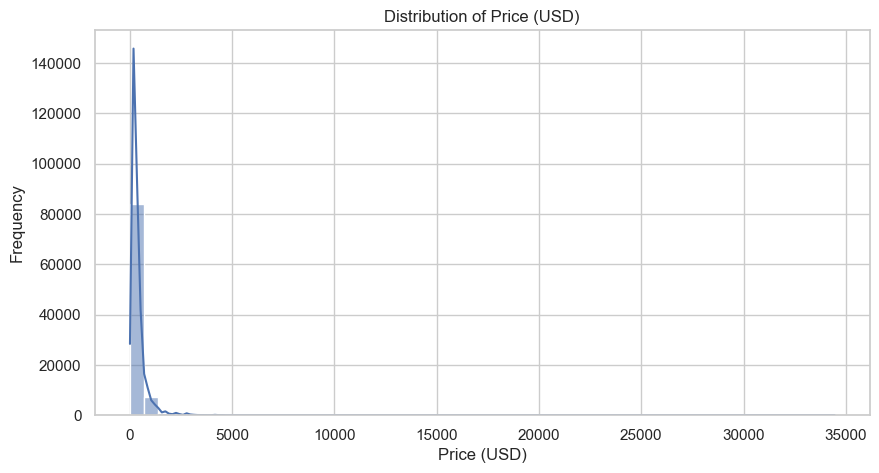

In [57]:
#Price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Price in USD"], bins=50, kde=True)
plt.title("Distribution of Price (USD)")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


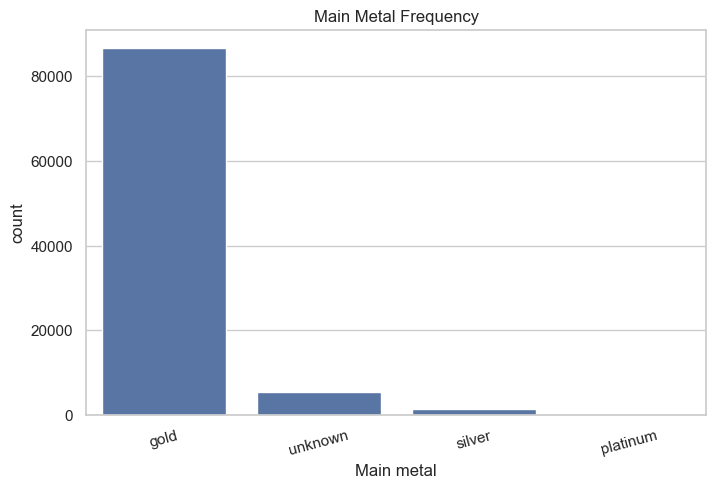

In [72]:
#Count Plots for Categorical Features
plt.figure(figsize=(8, 5))
sns.countplot(x="Main metal", data=df, order=df["Main metal"].value_counts().index)
plt.title("Main Metal Frequency")
plt.xticks(rotation=15)
plt.show()


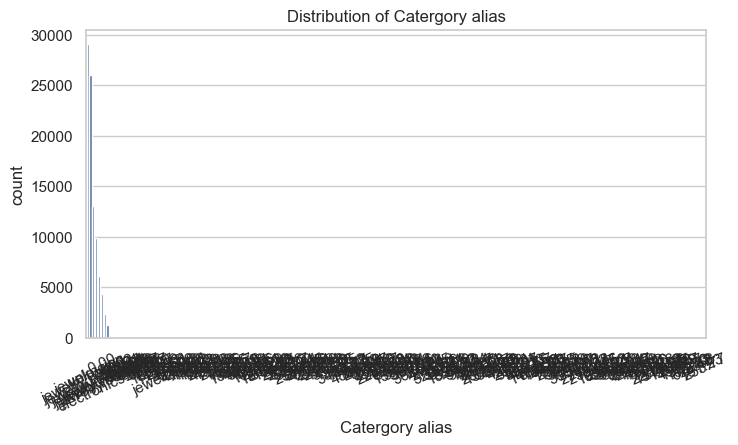

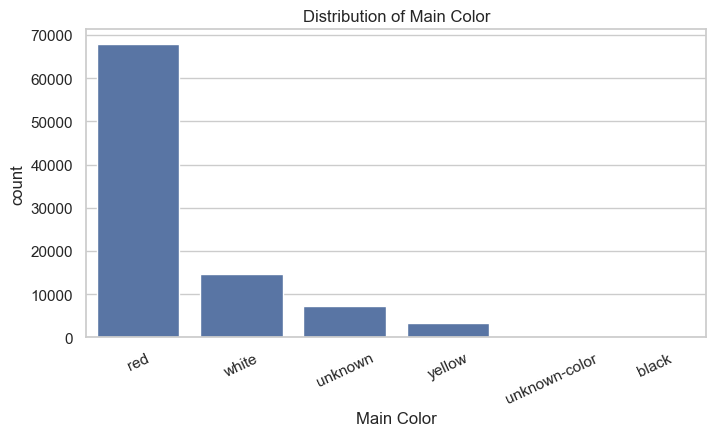

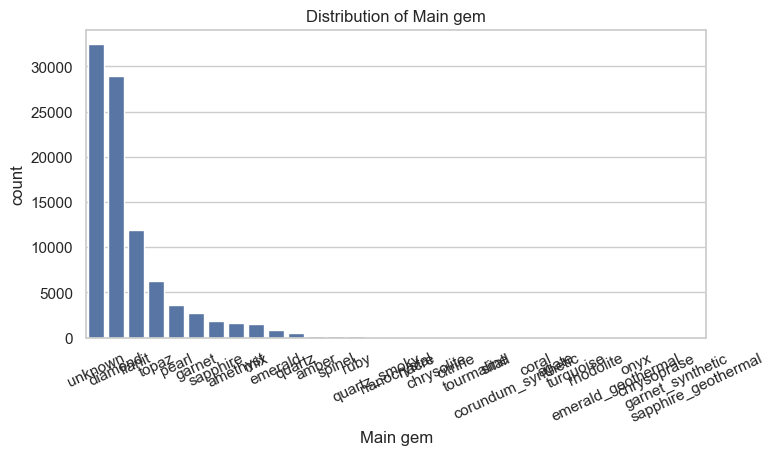

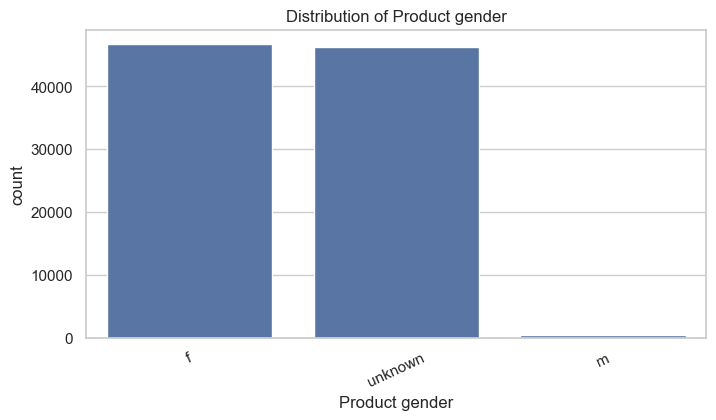

In [69]:
for col in ["Catergory alias", "Main Color", "Main gem", "Product gender"]:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=25)
    plt.show()


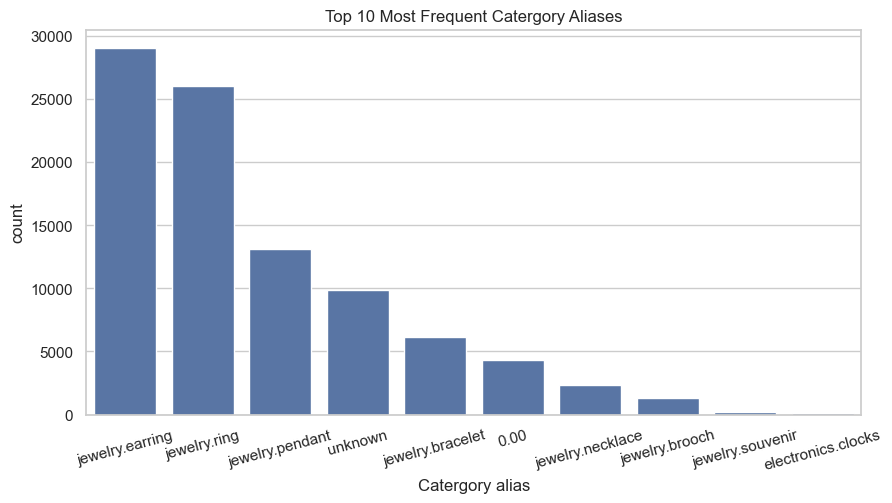

In [70]:
#Fixing Catergory alias
top_categories = df["Catergory alias"].value_counts().nlargest(10).index

plt.figure(figsize=(10, 5))
sns.countplot(data=df[df["Catergory alias"].isin(top_categories)], x="Catergory alias", order=top_categories)
plt.xticks(rotation=15)
plt.title("Top 10 Most Frequent Catergory Aliases")
plt.show()


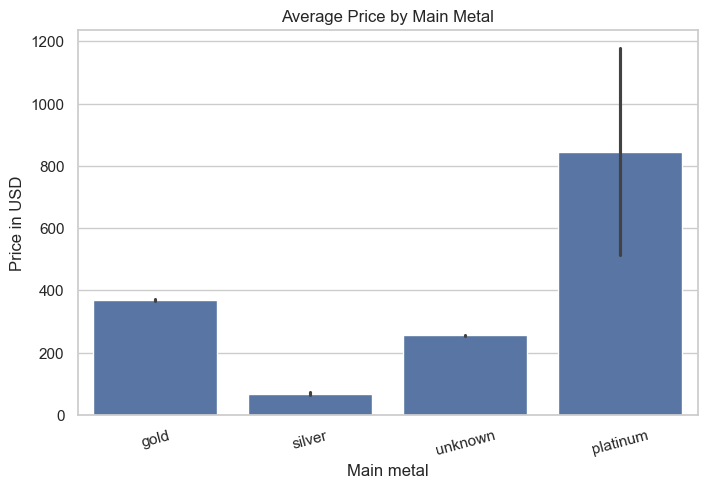

In [71]:
#Relationship Between Features and PriceRelationship Between Features and Price
plt.figure(figsize=(8, 5))
sns.barplot(x="Main metal", y="Price in USD", data=df, estimator=np.mean)
plt.title("Average Price by Main Metal")
plt.xticks(rotation=15)
plt.show()


Feature Engineering + Modeling

In [90]:
# Convert Order datetime to actual datetime
df['Order datetime'] = pd.to_datetime(df['Order datetime'])

# Create date-related features
df['Order Month'] = df['Order datetime'].dt.month
df['Order Weekday'] = df['Order datetime'].dt.day_name()

# Create price category feature
def price_category(price):
    if price < 50:
        return 'Low'
    elif price < 200:
        return 'Mid'
    else:
        return 'High'

df['Price Category'] = df['Price in USD'].apply(price_category)


In [91]:
df.head()

,Order datetime,quantity of Sku,Catergory alias,Price in USD,Product gender,Main Color,Main metal,Main gem,Order Month,Order Weekday,Price Category
0,2018-12-01 11:40:29+00:00,1,jewelry.earring,561.51,unknown,red,gold,diamond,12,Saturday,High
1,2018-12-01 17:38:31+00:00,1,unknown,212.14,unknown,yellow,gold,unknown,12,Saturday,High
2,2018-12-02 13:53:42+00:00,1,jewelry.pendant,54.66,f,white,gold,sapphire,12,Sunday,Mid
3,2018-12-02 17:44:02+00:00,1,jewelry.pendant,88.90,f,red,gold,diamond,12,Sunday,Mid
4,2018-12-02 21:30:19+00:00,1,jewelry.necklace,417.67,unknown,red,gold,amethyst,12,Sunday,High


In [94]:
#predict the price of a jewelry item using some of the new and existing features: (Price in usd)
# Define your target (what you want to predict)
y = df['Price in USD']

# Select useful features (input columns)
X = df[['Catergory alias', 'Product gender', 'Main metal', 'Main gem', 'Order Month', 'Order Weekday']]
# Define your target (what you want to predict)
y = df['Price in USD']

# Select useful features (input columns)
X = df[['Catergory alias', 'Product gender', 'Main metal', 'Main gem', 'Order Month', 'Order Weekday']]


In [96]:
# Drop rows with missing values in the selected columns
X_clean = X.dropna()
y_clean = y[X_clean.index]  # Keep the matching target values

# One-hot encode the categorical columns
X_encoded = pd.get_dummies(X_clean)
X_encoded.head()

,Order Month,Catergory alias_0.00,Catergory alias_1.23,Catergory alias_101.23,Catergory alias_102.10,Catergory alias_104.79,Catergory alias_108.33,Catergory alias_108.53,Catergory alias_109.45,Catergory alias_1098.03,...,Main gem_tourmaline,Main gem_turquoise,Main gem_unknown,Order Weekday_Friday,Order Weekday_Monday,Order Weekday_Saturday,Order Weekday_Sunday,Order Weekday_Thursday,Order Weekday_Tuesday,Order Weekday_Wednesday
0,12,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,12,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,12,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,12,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,12,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [97]:
#Split the data
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_clean, test_size=0.2, random_state=42
)

In [98]:
#Train a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Create the model
model = DecisionTreeRegressor()

# Train it on your training data
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [99]:
#Evaluate the model
from sklearn.metrics import mean_absolute_error

# Make predictions
y_pred = model.predict(X_test)

# Measure accuracy
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 174.83893892657898


In [101]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error
mae_rf = mean_absolute_error(y_test, rf_pred)
print("MAE with Random Forest:", mae_rf)

MAE with Random Forest: 173.5306865387454


In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Step 1: Create and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Make predictions
rf_pred = rf_model.predict(X_test)

# Step 3: Evaluate
mae_rf = mean_absolute_error(y_test, rf_pred)
print("🌲 Random Forest MAE:", mae_rf)


🌲 Random Forest MAE: 173.5306865387454


In [103]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Model trained!")

✅ Model trained!
